In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
import os
import ast
import re
import calendar
import math
from sklearn import metrics

# 1.Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
parent_dir = "/content/drive/MyDrive/DATA ML"
all_dataframes = []

for directory in os.listdir(parent_dir):
    dir_path = os.path.join(parent_dir, directory)
    print(directory)

    if os.path.isdir(dir_path):
        for file in os.listdir(dir_path):
            if file.endswith('.csv'):
                file_path = os.path.join(dir_path, file)
                print(f"Reading {file_path}...")
                try:
                    # Read CSV file and append to list
                    df = pd.read_csv(file_path,on_bad_lines='skip', delimiter=';')
                    all_dataframes.append(df)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}. Skipping...")

df = pd.DataFrame()
if all_dataframes:
    df = pd.concat(all_dataframes, ignore_index=True)
else:
    print("No CSV files found.")


Mahdi ch
Reading /content/drive/MyDrive/DATA ML/Mahdi ch/movie_data-1.csv...
Reading /content/drive/MyDrive/DATA ML/Mahdi ch/movie_data-2-3.csv...
Reading /content/drive/MyDrive/DATA ML/Mahdi ch/movie_data -4.csv...
Reading /content/drive/MyDrive/DATA ML/Mahdi ch/movie_data -5.csv...
Reading /content/drive/MyDrive/DATA ML/Mahdi ch/movie_data-6.csv...
Reading /content/drive/MyDrive/DATA ML/Mahdi ch/movie_data-7.csv...
Reading /content/drive/MyDrive/DATA ML/Mahdi ch/movie_data-8.csv...
Reading /content/drive/MyDrive/DATA ML/Mahdi ch/movie_data-9.csv...
Reading /content/drive/MyDrive/DATA ML/Mahdi ch/movie_data-10.csv...
medam
Reading /content/drive/MyDrive/DATA ML/medam/movie_data (3).csv...
Reading /content/drive/MyDrive/DATA ML/medam/movie_data (4).csv...
Reading /content/drive/MyDrive/DATA ML/medam/movie_data (5).csv...
Reading /content/drive/MyDrive/DATA ML/medam/movie_data (6).csv...
Reading /content/drive/MyDrive/DATA ML/medam/movie_data (2).csv...
Reading /content/drive/MyDrive/DA

In [ ]:

df.shape

(181915, 13)

In [ ]:
df.head()

,imdbId,name,genre,datePublished,contentRating,keywords,ratingValue,ratingCount,budget,Minutes,actors,directors,creators
0,tt1400001,Dreamtime of the Aborigines,"['Documentary', 'History', 'Mystery']",1998-05-03,TV-Y,aborigine,NaN,NaN,NaN,PT47M,"[{'name': 'Leonard Nimoy', 'id': 'nm0000559'}]",[],"[{'name': '', 'id': ''}, {'name': 'Lionel Frie..."
1,tt1400002,Lost Spirits of Cambodia,"['Documentary', 'History', 'Mystery']",1996-05-09,NaN,cambodia,NaN,NaN,NaN,NaN,"[{'name': 'Leonard Nimoy', 'id': 'nm0000559'}]","[{'name': 'Marshall Flaum', 'id': 'nm0281310'}]","[{'name': '', 'id': ''}, {'name': 'Lionel Frie..."
2,tt1400003,Machu Picchu: City in the Sky,"['Documentary', 'History', 'Mystery']",1995-10-08,TV-14,machu picchu,8.0,8.0,NaN,PT46M,[],"[{'name': 'Steven R. Talley', 'id': 'nm0848163'}]","[{'name': '', 'id': ''}]"
3,tt1400004,A Housewarming,['Comedy'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Ann Jillian', 'id': 'nm0422713'}, {...","[{'name': 'John Bowab', 'id': 'nm0100681'}]","[{'name': '', 'id': ''}, {'name': 'Deidre Fay'..."
4,tt1400005,Episode #1.8872,"['Drama', 'Romance']",NaN,TV-14,NaN,NaN,NaN,NaN,NaN,"[{'name': 'Joe Barbara', 'id': 'nm0053222'}, {...",[],"[{'name': '', 'id': ''}, {'name': '', 'id': ''}]"


In [ ]:
df.describe()

,ratingValue,ratingCount,budget
count,42388.000000,4.238800e+04,9462.000000
mean,6.970352,1.395061e+03,103.375608
std,1.340014,2.152111e+04,183.892035
min,1.000000,5.000000e+00,1.000000
25%,6.300000,1.100000e+01,5.000000
50%,7.200000,2.200000e+01,15.000000
75%,7.900000,7.700000e+01,100.000000
max,10.000000,1.522023e+06,999.000000


# 2.Data Preparation

## 2.1 Removing Unnecessary Data

### 2.1.1 Removing Unnecessary Rows

Our target value will be **ratingValue**, so we will be dropping all rows having this column as NaN

In [ ]:
df = df.drop(df[df["ratingValue"].isna()].index)

In [ ]:
df.shape

(42388, 13)

### 2.1.2 Removing Unnecessary Features

In [ ]:
df.columns

Index(['imdbId', 'name', 'genre', 'datePublished', 'contentRating', 'keywords',
       'ratingValue', 'ratingCount', 'budget', 'Minutes', 'actors',
       'directors', 'creators'],
      dtype='object')

We will be removing the next columns:


*   **imdbId:** This random number cannot have any realtionship with the film success
*   **name:** In some cases, the name can have a huge impact in the film success, but the models we will be working with will work with numbers essentially



In [ ]:
df.drop(["imdbId","name"],axis="columns",inplace=True)

## 2.2 Data Type Transformation

In [ ]:
df.dtypes

,0
genre,object
datePublished,object
contentRating,object
keywords,object
ratingValue,float64
ratingCount,float64
budget,float64
Minutes,object
actors,object
directors,object


In [ ]:
df.head()

,genre,datePublished,contentRating,keywords,ratingValue,ratingCount,budget,Minutes,actors,directors,creators
2,"['Documentary', 'History', 'Mystery']",1995-10-08,TV-14,machu picchu,8.0,8.0,NaN,PT46M,[],"[{'name': 'Steven R. Talley', 'id': 'nm0848163'}]","[{'name': '', 'id': ''}]"
5,"['Documentary', 'Game-Show', 'Reality-TV']",2009-03-25,NaN,NaN,6.6,13.0,NaN,NaN,"[{'name': 'Alan Sugar', 'id': 'nm0837377'}, {'...","[{'name': 'Andy Devonshire', 'id': 'nm1561194'}]","[{'name': '', 'id': ''}, {'name': '', 'id': ''..."
7,"['Comedy', 'Drama', 'Reality-TV']",2009-02-24,TV-14,NaN,5.2,8.0,NaN,PT43M,"[{'name': 'Amber Buhl', 'id': 'nm3268912'}, {'...",[],"[{'name': '', 'id': ''}, {'name': '', 'id': ''}]"
8,"['Comedy', 'Drama', 'Reality-TV']",2009-03-24,TV-14,NaN,5.0,8.0,NaN,PT43M,"[{'name': 'Amber Buhl', 'id': 'nm3268912'}, {'...",[],"[{'name': '', 'id': ''}, {'name': '', 'id': ''}]"
9,"['Comedy', 'Drama', 'Reality-TV']",2008-12-16,TV-14,NaN,7.0,11.0,NaN,PT43M,"[{'name': 'Amber Buhl', 'id': 'nm3268912'}, {'...",[],"[{'name': '', 'id': ''}]"


We have types problems with all these data:


*   **genre:** is not being read as an array
*   **actors, directors, creators:** is not being read as an array and also no need to keep the id
*   **keywords:** is not being read as an array of words
*   **datePublished:** is not being read as Date

We will have to transform these data types, to make the work easier for us later



In [ ]:
df['genre'] = df['genre'].apply(eval)
df['actors'] = df['actors'].apply(lambda x: [actor['name'] for actor in ast.literal_eval(x)] if x else [])
df['directors'] = df['directors'].apply(lambda x: [director['name'] for director in ast.literal_eval(x)] if x else [])
df['creators'] = df['creators'].apply(lambda x: [creator['name'] for creator in ast.literal_eval(x)] if x else [])
df['keywords'] = df['keywords'].apply(lambda x: [word for word in x.split(",")] if isinstance(x,str) else [])

After some python treatment, we have discovered that datePublished can eb: NaN, YYYY/MM/DD, YYYY-MM-DD, DD/MM/YYYY

We chose to normalise the date to one format (YYYY-MM-DD), so that we have no issue when converting it to pandas datetime

In [ ]:
def normalise_date(date):
  if pd.isna(date):
    return date
  date = re.sub(r'(\d{2})[-/](\d{2})[-/](\d{4})', r'\3-\2-\1', date)
  date = re.sub(r'(\d{4})[-/](\d{2})[-/](\d{2})', r'\1-\2-\3', date)
  return date

df['datePublished'] = df['datePublished'].apply(normalise_date)
df['datePublished'] = pd.to_datetime(df['datePublished'])

## 2.3 Feature Transformation

In [ ]:
df.dtypes

,0
genre,object
datePublished,datetime64[ns]
contentRating,object
keywords,object
ratingValue,float64
ratingCount,float64
budget,float64
Minutes,object
actors,object
directors,object


### 2.3.1 Actor And Genre Transformation

As we said above, the models we will be working with will have to deal with numbers rather than strings, for that reason we need to transform some columns to numbers.

After discussion we have agreed to assign a score to pair of actor and genre, that is because an actor can succeed in genre and fail in another.

To make it simple the score will be the mean of the rating value (the target value)

In [ ]:
mapGenreAndActorToScore= {}

df_actor_genre_rating = df[["actors","genre","ratingValue"]]
df_actor_genre_rating = df_actor_genre_rating.explode('actors').explode('genre')
mapGenreAndActorToScore = df_actor_genre_rating.groupby(['actors', 'genre'])['ratingValue'].mean().to_dict()

In [ ]:
len(mapGenreAndActorToScore)

90743

In [ ]:
RATING_VALUE_MEAN = df["ratingValue"].mean()

In [ ]:
def compute_actor_genre_score(row):
    actor_genre_pairs = [(actor, genre) for actor in row['actors'] for genre in row['genre']]
    scores = [mapGenreAndActorToScore.get(pair,RATING_VALUE_MEAN) for pair in actor_genre_pairs]
    if len(scores)>=1:
      return sum(scores) / len(scores)
    return RATING_VALUE_MEAN

In [ ]:
df['actorsGenresScore']  = df.apply(compute_actor_genre_score, axis=1)

In [ ]:
df.drop(columns=['actors', 'genre'], inplace=True)

### 2.3.2 Directors, Creators, Keywords Transformation

For Directors and Creators we will be doing the same, so we will be assign to each director, each creator and each keyword a score which will be the mean value of the rating value that he participated in

In [ ]:
mapDirectorToScore= {}

df_director_rating = df[["directors","ratingValue"]]
df_director_rating = df_director_rating.explode('directors')
mapDirectorToScore = df_director_rating.groupby(["directors"])['ratingValue'].mean().to_dict()

In [ ]:
len(mapDirectorToScore)

15442

In [ ]:
def compute_director_score(row):
    scores = [mapDirectorToScore.get(director,RATING_VALUE_MEAN) for director in row["directors"]]
    if len(scores)>=1:
      return sum(scores) / len(scores)
    return RATING_VALUE_MEAN

In [ ]:
mapCreatorToScore= {}

df_creator_rating = df[["creators","ratingValue"]]
df_creator_rating = df_creator_rating.explode('creators')
mapCreatorToScore = df_creator_rating.groupby(["creators"])['ratingValue'].mean().to_dict()

In [ ]:
len(mapCreatorToScore)

21703

In [ ]:
def compute_creator_score(row):
    scores = [mapCreatorToScore.get(creator,RATING_VALUE_MEAN) for creator in row["creators"]]
    if len(scores)>=1:
      return sum(scores) / len(scores)
    return RATING_VALUE_MEAN

In [ ]:
mapkeywordToScore= {}

df_keyword_rating = df[["keywords","ratingValue"]]
df_keyword_rating = df_keyword_rating.explode('keywords')
mapkeywordToScore = df_keyword_rating.groupby(["keywords"])['ratingValue'].mean().to_dict()

In [ ]:
len(mapkeywordToScore)

18426

In [ ]:
def compute_keyword_score(row):
    scores = [mapkeywordToScore.get(keyword,RATING_VALUE_MEAN) for keyword in row["keywords"]]
    if len(scores)>=1:
      return sum(scores) / len(scores)
    return RATING_VALUE_MEAN

In [ ]:
df[["directorsScore","creatorsScore","keywordsScore"]] = df.apply([compute_director_score,compute_creator_score,compute_keyword_score],axis=1)

In [ ]:
df.drop(columns=["directors",'creators', 'keywords'], inplace=True)

In [ ]:
df.head()

,datePublished,contentRating,ratingValue,ratingCount,budget,Minutes,actorsGenresScore,directorsScore,creatorsScore,keywordsScore
2,1995-10-08,TV-14,8.0,8.0,NaN,PT46M,6.970352,8.000000,6.980351,8.000000
5,2009-03-25,NaN,6.6,13.0,NaN,NaN,6.264042,6.238462,6.442698,6.970352
7,2009-02-24,TV-14,5.2,8.0,NaN,PT43M,5.892352,6.970352,6.980351,6.970352
8,2009-03-24,TV-14,5.0,8.0,NaN,PT43M,5.268783,6.970352,6.980351,6.970352
9,2008-12-16,TV-14,7.0,11.0,NaN,PT43M,5.892352,6.970352,6.980351,6.970352


### 2.3.3 DatePublished Transformation

We will be transforming DatePublished to how many days have passed from publishing the movies from now

In [ ]:
df["todayAgoPublished"] = (pd.to_datetime("01-01-2025") - df["datePublished"]).dt.days

In [ ]:
df.drop(columns=["datePublished"], inplace=True)

### 2.3.4 Minutes Transformation

We will convert this column into the number of minutes

In [ ]:
def convert_to_minutes(duration):
    try:
        if pd.isna(duration) or duration == 'nan':
            return None

        hours = 0
        minutes = 0

        hour_match = re.search(r'PT(\d+)H', duration)
        minute_match = re.search(r'(\d+)M', duration)

        if hour_match:
            hours = int(hour_match.group(1))
        if minute_match:
            minutes = int(minute_match.group(1))

        total_minutes = hours * 60 + minutes
        return  total_minutes

    except Exception as e:
        print(f"invalid conversion of {duration}")
        return  None



In [ ]:
df["minutes"] = df["Minutes"].apply(convert_to_minutes)

In [ ]:
df.drop(columns=["Minutes"], inplace=True)

### 2.3.5 ContentRating Transformation

In [ ]:
df["contentRating"].unique()

array(['TV-14', nan, 'TV-G', 'TV-PG', 'TV-Y', 'TV-Y7', 'Not Rated',
       'Unrated', 'Approved', 'R', 'TV-Y7-FV', 'TV-MA', 'X', 'E', 'E10+',
       'PG-13', 'PG', 'G', '18+', 'T', 'M', 'K-A', '16+', 'NC-17', '13+',
       '6+', '12+', 'EC', 'GP'], dtype=object)

This is not like the other features we were working on, because itcan be seen as an ordianl feature, for that reason we will be giving manually each possible value a number


We will give each value the min age that a person should have to watch the movie

In [ ]:
rating_to_age = {
    'nan': None,
    'Not Rated': None,
    'TV-14': 14,
    'TV-PG': 10,
    'PG-13': 13,
    'R': 17,
    'X': 18,
    'PG': 10,
    'TV-Y': 0,
    'TV-MA': 17,
    'TV-G': 0,
    'TV-Y7': 7,
    'Unrated': None,
    'Approved': 0,
    'E': 0,
    'K-A': 0,
    'M': 18,
    'TV-Y7-FV': 7,
    'E10+': 10,
    'T': 10,
    'G': 0,
    '18+': 18,
    '16+': 16,
    '6+': 6,
    '12+': 12,
    '13+': 13,
    'NC-17': 17,
    'EC': 3,
    'GP': 0
}

In [ ]:
df["minAgeToWatch"] = df["contentRating"].apply(lambda x : rating_to_age.get(x))

In [ ]:
df.drop(columns=["contentRating"], inplace=True)

## 2.4 Missing Values

In [ ]:
df.isnull().sum()

,0
ratingValue,0
ratingCount,0
budget,38131
actorsGenresScore,0
directorsScore,0
creatorsScore,0
keywordsScore,0
todayAgoPublished,4691
minutes,13583
minAgeToWatch,24737


### 2.4.1 Completing budget

In [ ]:
df["budget"].describe()

,budget
count,4257.000000
mean,100.460653
std,181.379749
min,1.000000
25%,4.000000
50%,15.000000
75%,100.000000
max,983.000000


In [ ]:
df["budget"].value_counts()

,count
budget,
1.0,463
10.0,322
2.0,302
5.0,204
3.0,202
...,...
209.0,1
465.0,1
44.0,1


The values have high large dispersion, we chose to not fill missing budget value with mean but with the median

In [ ]:
median_budget = df["budget"].median()
df['budget'] = df['budget'].fillna(median_budget)

### 2.4.2 Completing Minutes

In [ ]:
df["minutes"].describe()

,minutes
count,28805.000000
mean,48.191599
std,40.191186
min,1.000000
25%,22.000000
50%,30.000000
75%,72.000000
max,1452.000000


In [ ]:
(df["minutes"] >= 1320).sum()

2

The minutes have low std but we can make it better because there is a documentray film with 1452 minutes and another with 1320 which too high compared to other films.

So we can calculate the mean of the minutes wihtout this film as considered as the default value

In [ ]:
df_minutes_without_max = df.loc[df["minutes"]  < 1320,"minutes"]
df_minutes_without_max.describe()

,minutes
count,28803.000000
mean,48.098705
std,38.611581
min,1.000000
25%,22.000000
50%,30.000000
75%,72.000000
max,720.000000


In [ ]:
mean_minutes = df_minutes_without_max.mean()
df['minutes'] = df['minutes'].fillna(mean_minutes)

### 2.4.3 Completing todayAgoPublished

In [ ]:
df["todayAgoPublished"].describe()

,todayAgoPublished
count,37697.000000
mean,8782.493647
std,5112.935968
min,131.000000
25%,6074.000000
50%,6354.000000
75%,9438.000000
max,49308.000000


We will again the median here which is 6391 days ago, which will correspond to August 2007, (that era had a lot film)

In [ ]:
median_todayAgoPublished = df["todayAgoPublished"].median()
df['todayAgoPublished'] = df['todayAgoPublished'].fillna(median_todayAgoPublished)

### 2.4.4 Completing minAgeToWatch

In [ ]:
df["minAgeToWatch"].describe()

,minAgeToWatch
count,17651.000000
mean,9.243102
std,6.045521
min,0.000000
25%,7.000000
50%,10.000000
75%,14.000000
max,18.000000


We will set in this case 14 as the default value, (so by default 14 years old is the minimum age)

In [ ]:
min_age_by_default = 14
df['minAgeToWatch'] = df['minAgeToWatch'].fillna(min_age_by_default)

## 2.5 Discovering Duplicates

In [ ]:
df.duplicated().sum()

5007

Due to having a lot of missing values and filling it with the same value (median,mean...) we have now a lot of duplicated rows that we need to drop

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,ratingValue,ratingCount,budget,actorsGenresScore,directorsScore,creatorsScore,keywordsScore,todayAgoPublished,minutes,minAgeToWatch
2,8.0,8.0,15.0,6.970352,8.000000,6.980351,8.000000,10678.0,46.000000,14.0
5,6.6,13.0,15.0,6.264042,6.238462,6.442698,6.970352,5761.0,48.098705,14.0
7,5.2,8.0,15.0,5.892352,6.970352,6.980351,6.970352,5790.0,43.000000,14.0
8,5.0,8.0,15.0,5.268783,6.970352,6.980351,6.970352,5762.0,43.000000,14.0
9,7.0,11.0,15.0,5.892352,6.970352,6.980351,6.970352,5860.0,43.000000,14.0


## 3. Data Analysis

In [ ]:
df_frequency_distribution = df[["minutes","minAgeToWatch","todayAgoPublished","ratingValue"]]
df_frequency_distribution["year"] = df_frequency_distribution["todayAgoPublished"].apply(lambda x : (pd.to_datetime("01-01-2025") - pd.Timedelta(days=x)).year)
df_frequency_distribution["month"] = df_frequency_distribution["todayAgoPublished"].apply(lambda x : (pd.to_datetime("01-01-2025") - pd.Timedelta(days=x)).month)

<ipython-input-58-69332606a258>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency_distribution["year"] = df_frequency_distribution["todayAgoPublished"].apply(lambda x : (pd.to_datetime("01-01-2025") - pd.Timedelta(days=x)).year)
<ipython-input-58-69332606a258>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_frequency_distribution["month"] = df_frequency_distribution["todayAgoPublished"].apply(lambda x : (pd.to_datetime("01-01-2025") - pd.Timedelta(days=x)).month)


<ipython-input-59-8d0b98ec2d88>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  curr_ax.set_xticklabels([calendar.month_name[i] for i in month_bins], rotation=45)


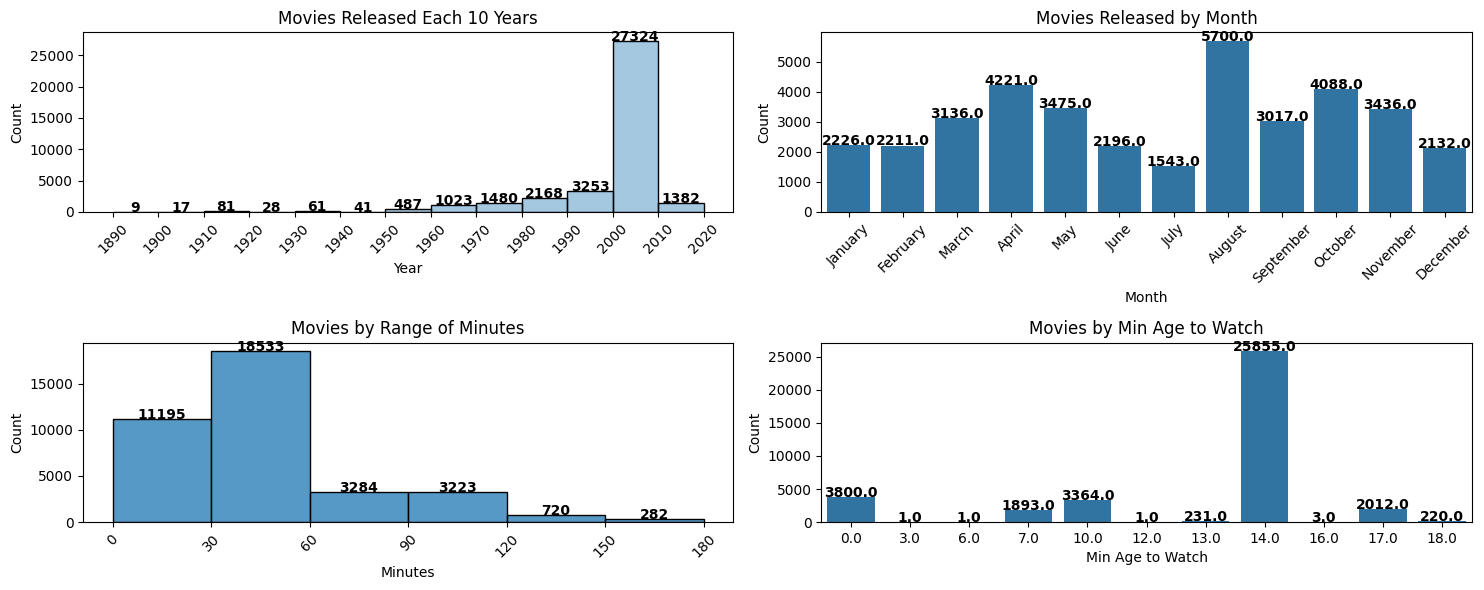

In [ ]:
def add_values(graph):
  for j,p in enumerate(graph.patches):
        curr_ax.annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

# Movies Released each 10 Years
curr_ax = ax[0, 0]
years_bins = list(range(1890, 2025, 10))
graph = sns.histplot(x=df_frequency_distribution["year"], bins=years_bins, ax=curr_ax, alpha=0.4)
add_values(graph)

curr_ax.set_xticks(years_bins)
curr_ax.set_xticklabels(years_bins, rotation=45)
curr_ax.set_title("Movies Released Each 10 Years")
curr_ax.set_xlabel("Year")
curr_ax.set_ylabel("Count")

# Movies Released by Month
curr_ax = ax[0, 1]
month_bins = list(range(1, 13))
graph = sns.countplot(x=df_frequency_distribution["month"], ax=curr_ax)
add_values(graph)

curr_ax.set_xticklabels([calendar.month_name[i] for i in month_bins], rotation=45)
curr_ax.set_title("Movies Released by Month")
curr_ax.set_xlabel("Month")
curr_ax.set_ylabel("Count")

# Movies by Range of Minutes
curr_ax = ax[1, 0]
min_bins = list(range(0, 181, 30))
graph = sns.histplot(x=df_frequency_distribution["minutes"], ax=curr_ax, bins=min_bins)
add_values(graph)

curr_ax.set_xticks(min_bins)
curr_ax.set_xticklabels(min_bins, rotation=45)
curr_ax.set_title("Movies by Range of Minutes")
curr_ax.set_xlabel("Minutes")
curr_ax.set_ylabel("Count")

# Movies by Range of minAgeToWatch
curr_ax = ax[1, 1]
graph = sns.countplot(x=df_frequency_distribution["minAgeToWatch"], ax=curr_ax)
add_values(graph)

curr_ax.set_title("Movies by Min Age to Watch")
curr_ax.set_xlabel("Min Age to Watch")
curr_ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

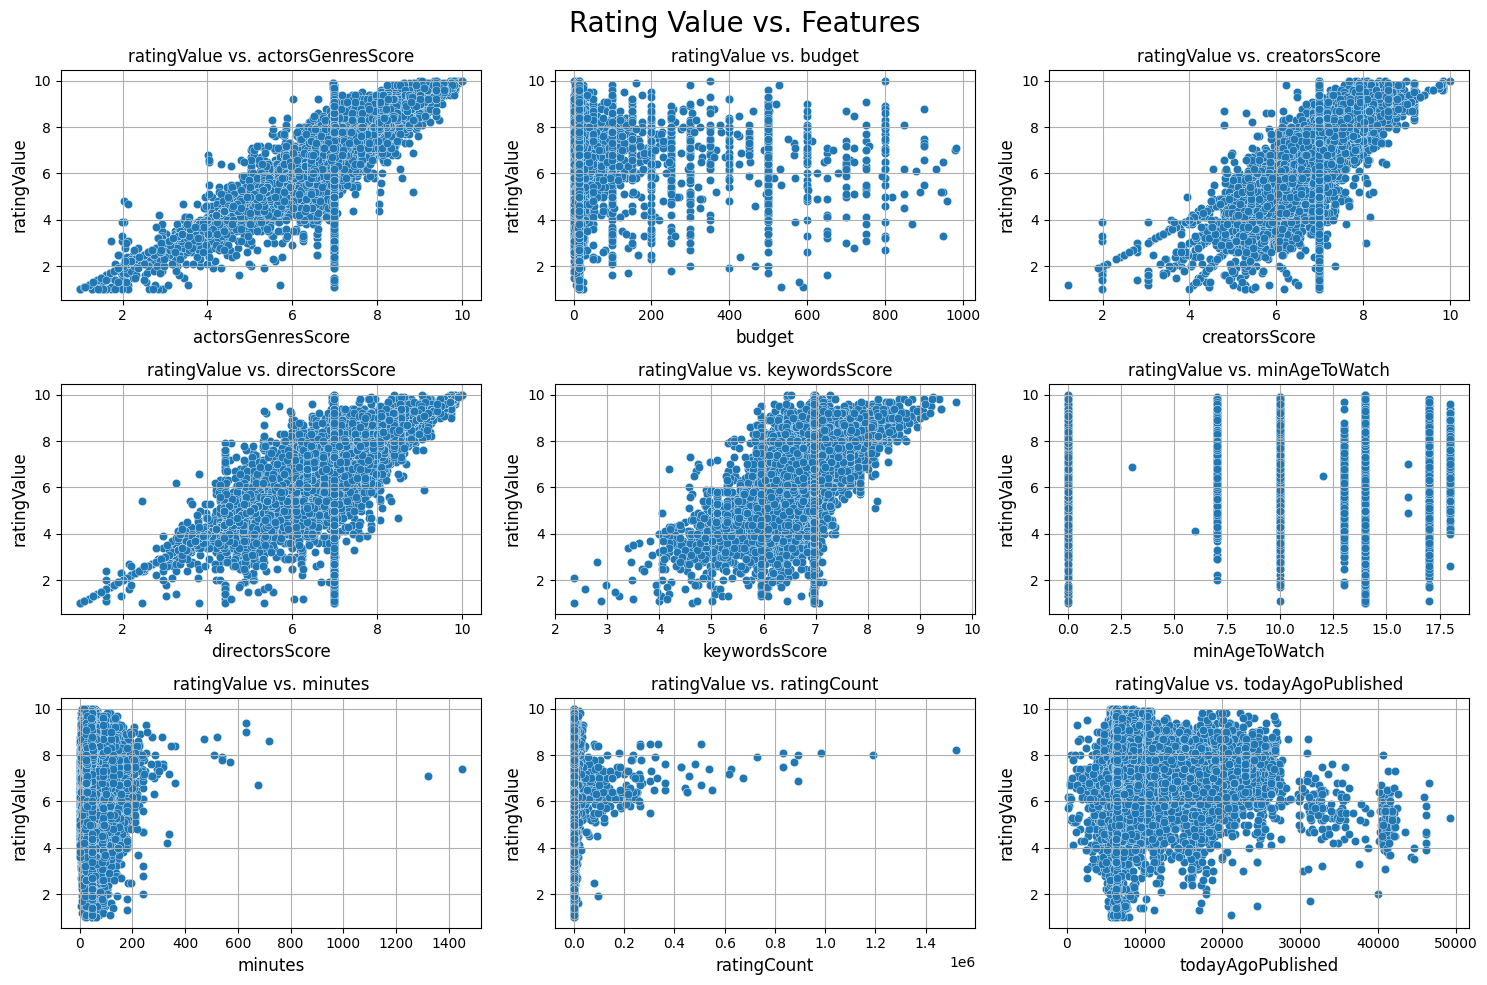

In [ ]:
target = "ratingValue"
columns = df.columns.difference([target])

size = len(columns)
ncols = 3
nrows = math.ceil(size / ncols)

fig , ax = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,10))
for i in range(size):
  x = i // nrows
  y = i % ncols
  col = columns[i]
  ax[x,y].scatter(df[col], df[target], edgecolors='w', linewidths=0.25)
  ax[x,y].set_title('{} vs. {}'.format(target, col), size = 12)
  ax[x,y].set_xlabel(col, size = 12)
  ax[x,y].set_ylabel(target, size = 12)
  ax[x,y].grid()

plt.suptitle('Rating Value vs. Features', size = 20)
plt.tight_layout()
plt.show()



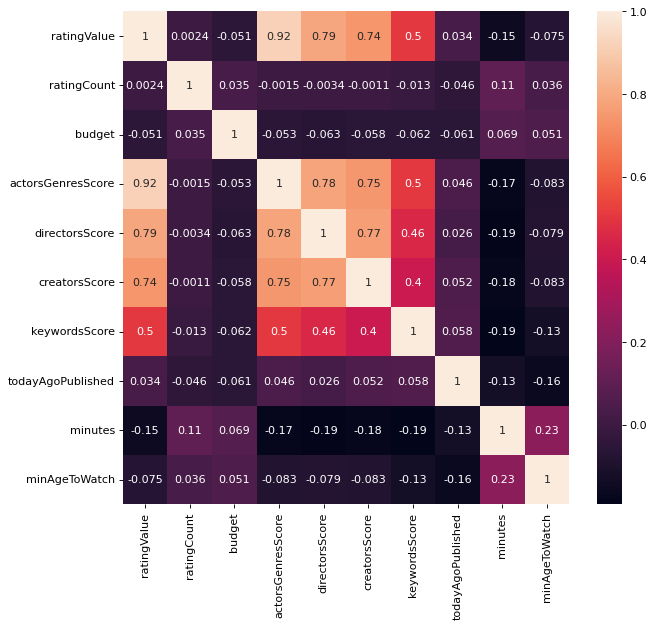

In [ ]:
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

# 4. Model training

In [ ]:
X = df.drop(target, axis=1)
y = df[target]

In [ ]:
# download the df in the csv file
from google.colab import files
df.to_csv('df.csv', index=False)
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (26166, 9)
X_test shape:  (11215, 9)
y_train shape:  (26166,)
y_test shape:  (11215,)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



1.   Linear Regression



In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
pd.DataFrame(data = np.append(linear_reg.intercept_ , linear_reg.coef_),
             index = ['Intercept']+[col+" Coef." for col in X.columns], columns=['Value']).sort_values('Value', ascending=False)

,Value
Intercept,6.964828
actorsGenresScore Coef.,1.005024
directorsScore Coef.,0.186668
creatorsScore Coef.,0.084198
keywordsScore Coef.,0.050604
minutes Coef.,0.028747
minAgeToWatch Coef.,0.004423
budget Coef.,0.004026
ratingCount Coef.,0.000940
todayAgoPublished Coef.,-0.009643


In [ ]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)

    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [ ]:
model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')

,Linear Reg.
MAE,0.320650
MSE,0.255084
RMSE,0.505058
R2-Score,0.859516


In [ ]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    df_comp.plot(y=['Actual','Predicted'], kind='bar', figsize=(20,7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data', fontsize=20)
    plt.ylabel('Rating', fontsize=15)
    plt.show()

In [ ]:
y_test_pred = linear_reg.predict(X_test_scaled)
df_comp = pd.DataFrame({'Actual':y_test[:100], 'Predicted':y_test_pred[:100]})

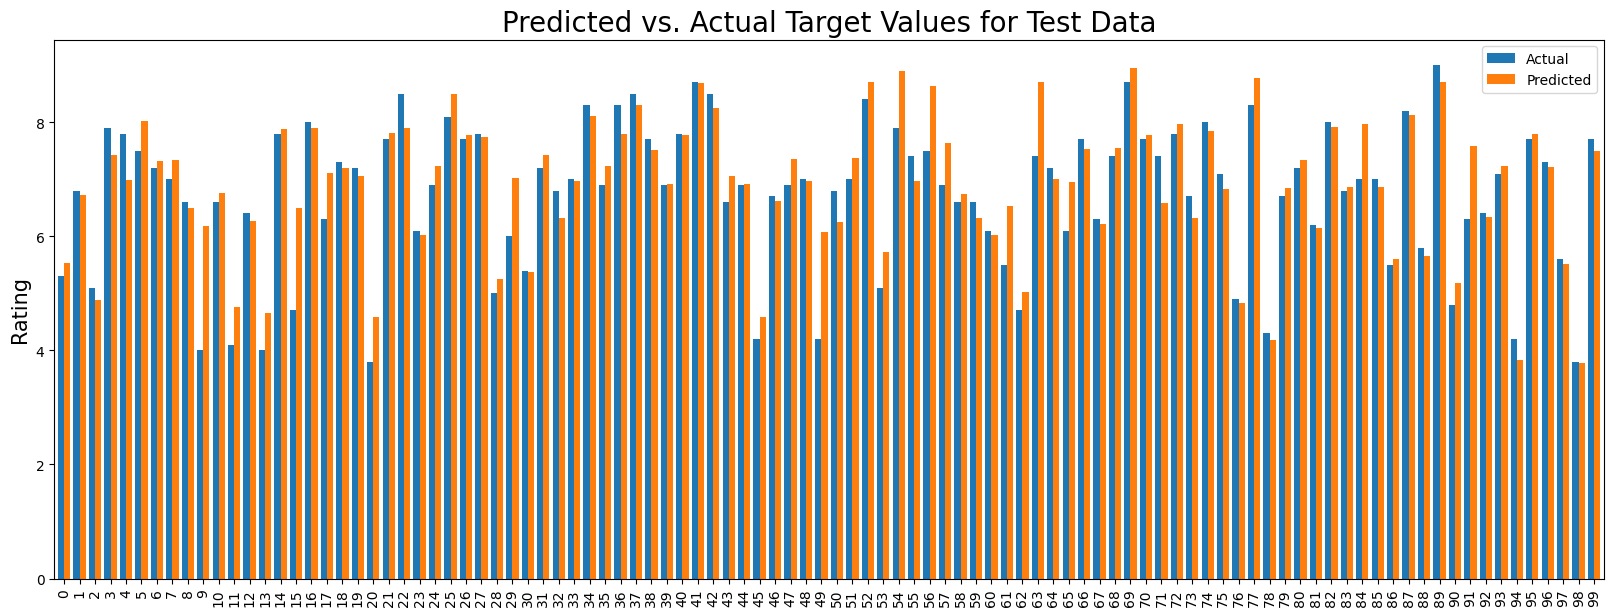

In [ ]:
compare_plot(df_comp)




2.   KNN



In [ ]:
from sklearn.neighbors import KNeighborsRegressor

We define a utity function to train the knn model based on our trainig set, we pass the k paramterer to the function and train our model.
We then show the metrics of our model and a plot showing the difference between the actual and predicted rating.

In [ ]:
def KNN_model(k):
    # 1. Initialize the KNN model
    knn_reg = KNeighborsRegressor(n_neighbors=k)

    # 2. Train the model
    knn_reg.fit(X_train_scaled, y_train)

    # 3. Evaluate the model
    knn_results = model_evaluation(knn_reg, X_test_scaled, y_test, f'K={k}')

    # Extract MSE
    mse = knn_results.loc['MSE', f'K={k}']

    print(f"K = {k}, MSE = {mse}")

    return mse

We loop over k values between 1 and 20, and return the best k value.

In [ ]:
# Define range of k values to test
k_values = range(1, 20, 2)

best_k = None
lowest_mse = float('inf')

for k in k_values:
    mse = KNN_model(k)

    if mse < lowest_mse:
        lowest_mse = mse
        best_k = k

print(f"\nBest K: {best_k} with lowest MSE: {lowest_mse}")

K = 1, MSE = 0.3545100312082033
K = 3, MSE = 0.2425826522019121
K = 5, MSE = 0.22753533660276415
K = 7, MSE = 0.220894829264742
K = 9, MSE = 0.21872111314762527
K = 11, MSE = 0.21895724807758207
K = 13, MSE = 0.22023842750753825
K = 15, MSE = 0.22194675781443507
K = 17, MSE = 0.22297064454272966
K = 19, MSE = 0.2246914982037067

Best K: 9 with lowest MSE: 0.21872111314762527




3.   XGBoost



          XGBoost Reg.
MAE           0.260509
MSE           0.181504
RMSE          0.426032
R2-Score      0.900039


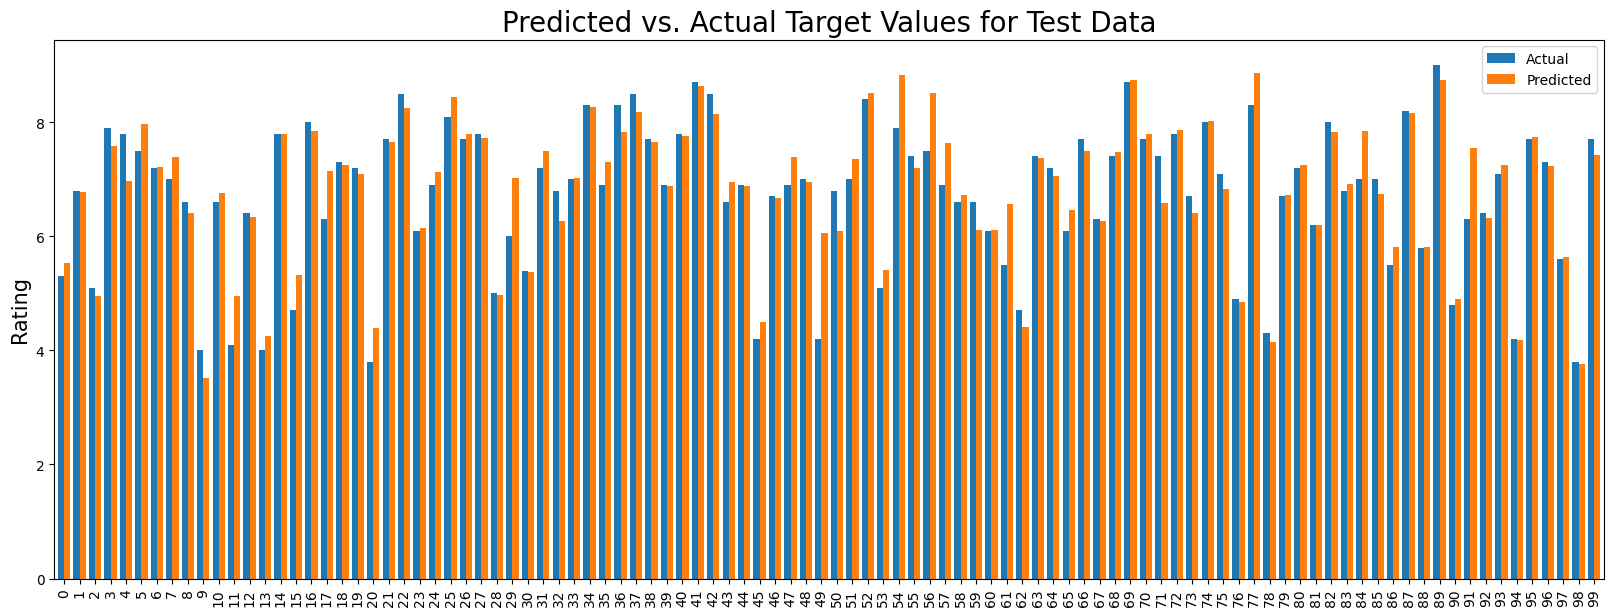

In [ ]:
from xgboost import XGBRegressor

# 1. Initialize the XGBoost model
xgb_reg = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6, random_state=0)

# 2. Train the model
xgb_reg.fit(X_train_scaled, y_train)

# 3. Evaluate the model
xgb_results = model_evaluation(xgb_reg, X_test_scaled, y_test, 'XGBoost Reg.')
print(xgb_results)

# 4. Predictions and visualization
y_test_pred_xgb = xgb_reg.predict(X_test_scaled)
df_comp_xgb = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_test_pred_xgb[:100]})

compare_plot(df_comp_xgb)




4.   Random Forest



          Random Forest Reg.
MAE                 0.258041
MSE                 0.186109
RMSE                0.431403
R2-Score            0.897503


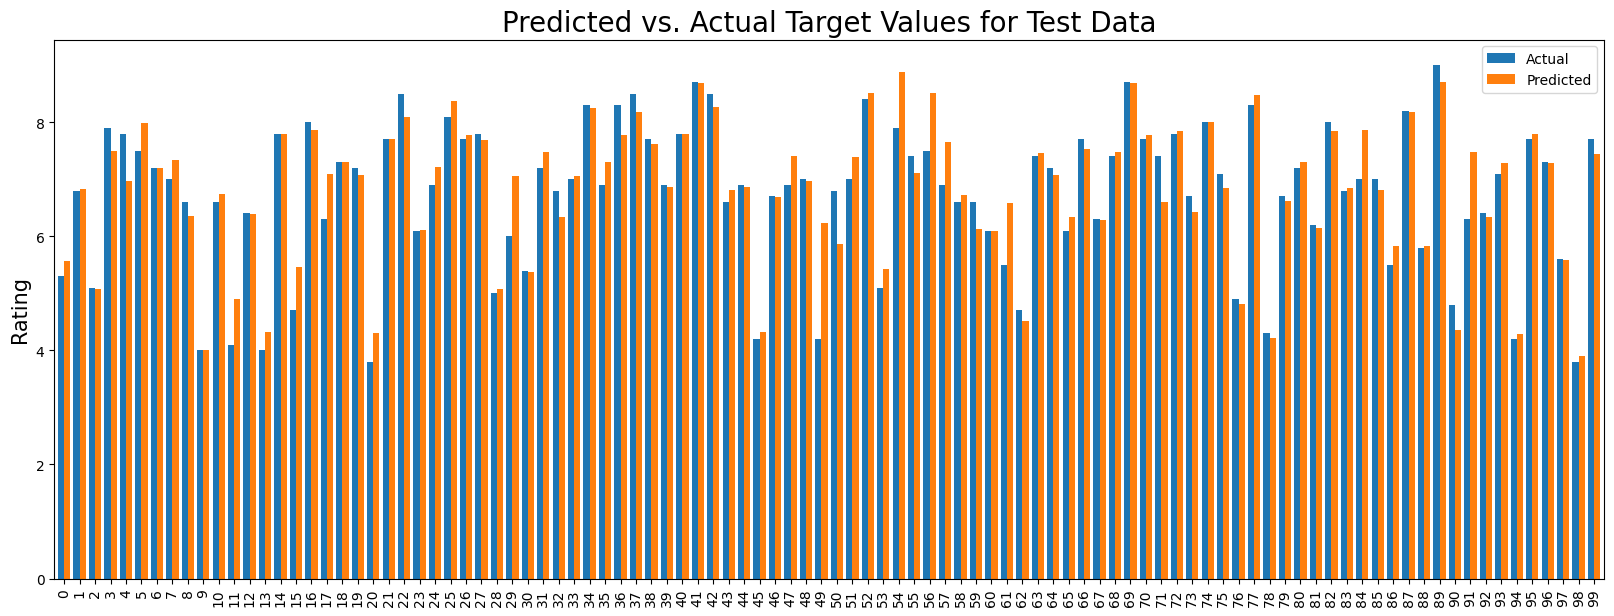

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
rf_reg.fit(X_train_scaled, y_train)

rf_results = model_evaluation(rf_reg, X_test_scaled, y_test, 'Random Forest Reg.')
print(rf_results)

y_test_pred_rf = rf_reg.predict(X_test_scaled)
df_comp_rf = pd.DataFrame({'Actual': y_test[:100], 'Predicted': y_test_pred_rf[:100]})

compare_plot(df_comp_rf)


### Run the XGBoost locally

In [ ]:
import joblib

joblib.dump(xgb_reg, "xgboost_model.pkl")


['xgboost_model.pkl']

In [ ]:
import joblib

# Load the saved model
xgb_reg_loaded = joblib.load('xgb_reg_model.pkl')

In [ ]:
print(X_test_scaled[:5])

[[-0.05155423 -0.13465124 -1.13739436 -1.45682724 -0.02635787 -0.18896216
  -0.47841252 -0.01150966 -0.45502948]
 [-0.04049468 -0.13465124 -0.15098728 -0.16856934 -0.09756872 -0.59263578
  -0.59674881 -1.03431755  0.42934261]
 [-0.06776865  1.22685287 -1.52825693 -1.79082003 -2.99614817  0.14408371
  -0.50723542  0.81978742  0.42934261]
 [ 0.22587175 -0.13465124  0.2234741   0.88112228  0.69987973 -0.69816244
  -0.59695178  1.65413466  0.42934261]
 [-0.06875277 -0.13465124 -0.00586072 -0.00600794 -0.0421499   0.14408371
  -0.56853484  0.78888567  0.42934261]]


In [ ]:
y_test_pred_xgb = xgb_reg.predict(X_test_scaled[:5])

print(y_test_pred_xgb)

[5.524417  6.7699265 4.950463  7.5816636 6.975576 ]


In [ ]:
y_new_pred_xgb = xgb_reg_loaded.predict(X_test_scaled[:5])

print(y_new_pred_xgb)

[5.524417  6.7699265 4.950463  7.5816636 6.975576 ]
